### **Course: Introduction to Data Science **


**Data Science Project No. 9**





**Topic of project: Credit Card Approval Prediction**

**Members:**

  Dokic, Dusan (2561222), dusan.dokic.dd@gmail.com

  Khan, Sara (2571648), saradelhi29@gmail.com

  Nguyen, Thi Thuy Trang (2581300), ttt.nguyen.tn@gmail.com

**Submission Due: ** 07-17-20

**How to run the code**

In [ ]:
#Requirements for running the code
#Jupyter notebook, internet connection
#If the below libraries are not installed, please incomment this cell and install them
"""
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install tensorflow
!pip install keras
!pip install xgboost
!pip install matplotlib
!pip install seaborn
"""
#Then click on Runtime tab and press Run

#Alternative 
#Open the notebook on Google colab using the below link, uncomment it
"""
https://colab.research.google.com/drive/1dSom909pvqcf9VYeDLjLUZjGjH9omhwk?usp=sharing
"""
#Add data files application_record.csv and credit_record.csv in Files section

'\nhttps://colab.research.google.com/drive/1dSom909pvqcf9VYeDLjLUZjGjH9omhwk?usp=sharing\n'

The project follows CRISP-DM Framework


![alt text](https://drive.google.com/uc?export=view&id=1TrAk2LvNWsDToALQtd_2TAWn-0JjlUiZ)


Source: [1]



**1. Business Understanding**

A big part of the risk management of a bank consists of answering the question, whether the cus-tomer a bank is dealing with is reliable. Besides extending loans to existing customers or approv-ing loans, banks are always taking a risk when offering a credit card to new customers (Moin & Ahmed, 2012).
The goal of this project is to analyze the data submitted by credit card applicants in order to pre-dict credit card approvals or rejections.
Current research, such as that of R. Sentiono et. al. (2009) and Peng Yi et. al. (2010) suggest that neural networks as well as ensemble learning methods, provide the best results when it comes to financial risk prediction. 


**2. Data Understanding**



*Importing the libraries*


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import itertools
import IPython
import traceback
import re
import plotly.graph_objs as go
import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from pandas import Series
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras import models
from keras import layers
from keras import optimizers


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

max_bin = 20
force_bin = 3

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

Using TensorFlow backend.


*Reading the dataset [2] into dataframes*

*The table “application record” table that contains information about the person applying for the credit card, like the gender, education level and marital status, to name only a few of the features that are used for the prediction.*

In [2]:
#reading application records
df = pd.read_csv("application_record.csv")
df.tail(10)

FileNotFoundError: ignored

Detailed data description of application_record

![Detailed data description of Credit Card Approval Prediction dataset](https://drive.google.com/uc?export=view&id=1Jrg0Yq8knhwDkfHOf8vSq1TFLz_mjTlq)

In [ ]:
#Total number of rows
print("Total number of rows", df.shape)

In [ ]:
df.describe(include='all')

*Explanation: Few of the rows containing missing values. As a result, some of column values are not defined or NaN*

In [ ]:
#calculate gender in percent
gender_percent = df.CODE_GENDER.value_counts(normalize = True)
gender_percent

In [ ]:
#Source: [3]
sns.countplot(x='CODE_GENDER', hue='CODE_GENDER', data=df);
plt.rcParams['figure.figsize'] = (4,4)
plt.show();

*Explanation: The number rows for female accounts are more than male accounts.
(More than half of the customers are women with 67.13%. Men are only 32.29%)*


In [ ]:
#Source: [3]
sns.countplot(x='NAME_FAMILY_STATUS', hue='NAME_FAMILY_STATUS', data=df);
plt.rcParams['figure.figsize'] = (8,6)
plt.show();

*Explanation: The highest number of accounts are from people whose family status is married.*


In [ ]:
#ax = sns.countplot(y="OCCUPATION_TYPE", hue="CODE_GENDER", data= df, palette="muted")
sns.countplot(y="OCCUPATION_TYPE", hue="CODE_GENDER", data= df, palette="muted")
plt.rcParams['figure.figsize'] = (12,10)
plt.show();

*The table “credit record”, shows how the credit
card is being used in regards to due dates, for every month since the issuing of the card.*

In [ ]:
#reading credit records
cc_app = pd.read_csv("credit_record.csv")
cc_app.tail(20)

#Detailed data description of credit_record

![Detailed data description of Credit Card Approval Prediction dataset](https://drive.google.com/uc?export=view&id=1vefft5ttEoCaPJlwkN7eQKK1MBEDm7Si)

In [ ]:
#Source: [3]
sns.countplot(x='STATUS', hue='STATUS', data=cc_app);
plt.rcParams['figure.figsize'] = (12,4)
plt.show();

**2.2 Describing the data**

*Looking for empty or null values*

In [ ]:
#looking at data and for NaN Value
df.info()
df.shape

In [ ]:
#looking at data and for NaN Value
cc_app.info()
cc_app.shape

**3. Data Preparation**

"Generally, credit card companies will begin reaching out to the customer once their minimum amount due on the account has been late for 30 days.
If the account is still delinquent for 60 days or longer, then the credit card company will typically begin the process of debt collection."
[Source](https://www.investopedia.com/terms/d/delinquent-account-credit-card.asp#:~:text=For%20the%20perspective%20of%20a,from%20their%20original%20due%20date.&text=This%20process%20can%20involve%20legal,use%20of%20credit%20collection%20firms.) [5]

Therefore we should define Accounts at risk as the ones with a "STATUS" of 2-5

The Dataset consists therefor of 2 Groups: 

**Good Accounts** with STATUS: **0,1,X,C**

**Bad Accounts** with STATUS: **2,3,4,5**'

In [ ]:
#finding out when the accounts were opened and adding it to the dataset
#Source:[16]
begin_month=pd.DataFrame(cc_app.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'})
print(begin_month.shape)
print(df.shape)
df_merged=pd.merge(df,begin_month,how="left",on="ID") 
df_merged.head(10)

In [ ]:
#creating dep_value variable in cc dataset to flag as either "Good Account" = "No" or "Bad Accounts" = "Yes"
#Source:[16]
cc_app['dep_value'] = None
cc_app['dep_value'][cc_app['STATUS'] =='2']='Yes' 
cc_app['dep_value'][cc_app['STATUS'] =='3']='Yes' 
cc_app['dep_value'][cc_app['STATUS'] =='4']='Yes' 
cc_app['dep_value'][cc_app['STATUS'] =='5']='Yes' 

In [ ]:
#Creating new variable "target" in the dataframe that shows if account is good or bad where 1 = bad and 0 = good
#Source:[16] 
cpunt=cc_app.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
cpunt['dep_value'][cpunt['dep_value'] == 0]='No' 
cpunt = cpunt[['dep_value']]
df_merged=pd.merge(df_merged,cpunt,how='inner',on='ID')
df_merged['target']=df_merged['dep_value']
df_merged.loc[df_merged['target']=='Yes','target']=1
df_merged.loc[df_merged['target']=='No','target']=0

In [ ]:
print(cpunt['dep_value'].value_counts())
cpunt['dep_value'].value_counts(normalize=True)

In [ ]:
#Source: [4]
df2 = pd.DataFrame({'amount': [45318, 667]},
                  index=['Good Accounts', 'Bad Accounts'])

plot = df2.plot(kind='pie', subplots=True)
for ax in plot:
    ax.set_aspect('equal')
    ax.yaxis.set_label_coords(-0.3, 0.5)

plt.subplots_adjust(wspace=0.5)

plt.show()


In [ ]:
#looking for Null-Values
df_merged.info()
df_merged.shape

In [ ]:
#dropping NaN Values
df_merged = df_merged.dropna()
print(df_merged.shape)

*Explanation: After removing rows containing NaN values, only 25K rows are left.*

In [ ]:
#Correlation of columns in dataframe, Source:[6]
C_mat = df_merged.corr()
sns.heatmap(C_mat, vmax = 1, vmin= -1,cmap="YlGnBu", square=True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()
print(df_merged.shape)

*Explanation: The above correlation heatmap clearly shows how variables are correlated to each other. For example, Count of family members is positively correlated to number of children.*

In [ ]:
#separating target variable from data set
inputs = df_merged.drop('target',axis= 'columns')
target = df_merged['target']
target=target.astype("int")

In [ ]:
#encoding labels into numbers for machine learning
le_gender = LabelEncoder()
le_car = LabelEncoder()
le_realty = LabelEncoder()
le_income_type = LabelEncoder()
le_educ = LabelEncoder()
le_fam = LabelEncoder()
le_hous = LabelEncoder()
le_occ = LabelEncoder()

In [ ]:
inputs['gender_n'] = le_gender.fit_transform(inputs['CODE_GENDER'])
inputs['car_n'] = le_gender.fit_transform(inputs['FLAG_OWN_CAR'])
inputs['realty_n'] = le_gender.fit_transform(inputs['FLAG_OWN_REALTY'])
inputs['income_type_n'] = le_gender.fit_transform(inputs['NAME_INCOME_TYPE'])
inputs['educ_n'] = le_gender.fit_transform(inputs['NAME_EDUCATION_TYPE'])
inputs['fam_n'] = le_gender.fit_transform(inputs['NAME_FAMILY_STATUS'])
inputs['hous_n'] = le_gender.fit_transform(inputs['NAME_HOUSING_TYPE'])
inputs['occ_n'] = le_gender.fit_transform(inputs['OCCUPATION_TYPE'])

In [ ]:
inputs.head()

In [ ]:
#dropping all columns with non-numerical values
inputs_n = inputs.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','dep_value' ], axis='columns')
inputs_n

In [ ]:
ivtable=pd.DataFrame(df_merged.columns,columns=['variable'])
ivtable['IV']=None
namelist = ['FLAG_MOBIL','begin_month','dep_value','target','ID']

for i in namelist:
    ivtable.drop(ivtable[ivtable['variable'] == i].index, inplace=True)

**3.1 Engineer Features**

= is an assault that involves several techniques, for example: Filling missing values by coding categorical variables, variable transformation and creating new variables from existing ones.


*   Machine learning libraries do not support missing values or strings as input
*   A few machine models react sensitively to the characteristics of scale




**Weight of evidence and Information Value**

The concepts weight of evidence and information value are derived from the logistic regression technique. These models were developed to predict the risk of credit default. With the help of WoE and IV, the prediction can be calculated with different factors, i.e. the creditworthiness is checked into "good" and "bad" customers.

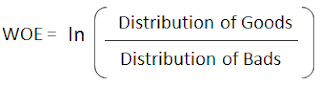

**Distribution of Goods** - % of Good Customers in a particular group

**Distribution of Bads** - % of Bad Customers in a particular group 

**ln** - Natural Log

A differentiation is made between good and bad customers, i.e. good customers pay back their credit / invoice on time, whereas bad customers do not. The distribution is given as a percentage of good and bad customers



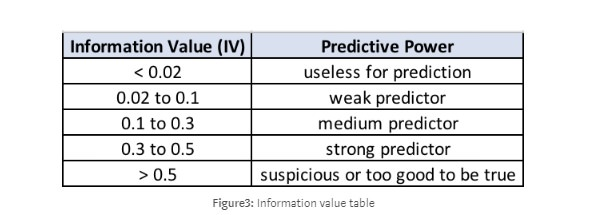

[Source](https://https://www.kaggle.com/pavansanagapati/weight-of-evidence-woe-information-value-iv)


**Calculate WoE and IV**

If you specify Panda's DataFrame, the attribute name and the name of the target variable, it will perform the calculations.
The function returns the Pandas DataFrame and the IV value. 

In [ ]:
# Define function to calculate information value and WoE
#https://gist.github.com/danyashorokh/b2f894c2ab29ba927944493597dca152

def calc_iv_woe(df1, feature, target, pr=False): #pr = enable printing of the output
    lst = []
    df1[feature] = df1[feature].fillna("NULL")

    for i in range(df1[feature].nunique()):
        val = list(df1[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df1[df1[feature] == val].count()[feature],                        # All
                    df1[(df1[feature] == val) & (df1[target] == 0)].count()[feature],  # Good
                    df1[(df1[feature] == val) & (df1[target] == 1)].count()[feature]]) # Bad 

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    
    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv) #prints interpretation of IV of a feature
    print(df1[feature].value_counts())
    return iv, data

**Create dummies variable**

Replace the categorical variable with one or more characteristics, which can have the values 0 and 1 This allows you to display any number of categories so that one new characteristic is introduced for each category. 


(*See below: Categorical variable* - For example: NAME_EDUCATION_TYPE 

Possible Values are: higher education, incomplete higher, lower secondary
To encode these possible values, new characteristics are created with these following names:

       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary'
)

The value for the prefix attribute is passed for this method, so you see the string

In [ ]:
#create dummies 
#Source[16]
def convert_dummy(df1, feature,rank=0):
    pos = pd.get_dummies(df1[feature], prefix=feature)
    mode = df1[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df1.drop([feature],axis=1,inplace=True)
    df1=df1.join(pos)
    return df1

In [ ]:
#Source[16]
def get_category(df1, col, binsnum, labels, qcut = False):
    if qcut:
        localdf1 = pd.qcut(df1[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf1 = pd.cut(df1[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf1 = pd.DataFrame(localdf1)
    name = 'gp' + '_' + col
    localdf1[name] = localdf1[col]
    df1 = df1.join(localdf1[name])
    df1[name] = df1[name].astype(object)
    return df1

**Binary features**

Classify a binary features in which the characteristic questions are "Yes" and "No" like Yes = 1 and No = 0

for example for gender "F" and "M"
This can be encoded as F = 0 and M = 1

*Note:*


*   If Distribution Good > Distribution Bad --> WoE postive
*   If Distribution Good < Distribution Bad --> WoE negative
*   IV value is always positiv


In [ ]:
#Check the gender and calculate the WoE and IV
#Source[16]
df_merged['CODE_GENDER'] = df_merged['CODE_GENDER'].replace(['F','M'],[0,1])
print(df_merged['CODE_GENDER'].value_counts())
iv, data = calc_iv_woe(df_merged,'CODE_GENDER','target')
ivtable.loc[ivtable['variable']=='CODE_GENDER','IV']=iv
data.head()

The sum of IV gives the total value of IV:

IV0 + IV1 = 0,02520

0.010473 + 0.014730 = 0.02520350452745081

In [ ]:
#Check if a person has a car or not
#Source[16]
df_merged['FLAG_OWN_CAR'] = df_merged['FLAG_OWN_CAR'].replace({'Y':1}, {'N':0})
print(df_merged['FLAG_OWN_CAR'].value_counts())
iv, data = calc_iv_woe(df_merged,'FLAG_OWN_CAR','target')
ivtable.loc[ivtable['variable']=='FLAG_OWN_CAR','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged['FLAG_OWN_REALTY'] = df_merged['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])
print(df_merged['FLAG_OWN_REALTY'].value_counts())
iv, data = calc_iv_woe(df_merged,'FLAG_OWN_REALTY','target')
ivtable.loc[ivtable['variable']=='FLAG_OWN_REALTY','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged['FLAG_PHONE'] = df_merged['FLAG_PHONE'].astype(str) #converting number to strings
print(df_merged['FLAG_PHONE'].value_counts(normalize=True,sort=False))
df_merged.drop(df_merged [df_merged['FLAG_PHONE'] == 'nan'].index, inplace=True)
iv, data = calc_iv_woe(df_merged,'FLAG_PHONE','target')
ivtable.loc[ivtable['variable']=='FLAG_PHONE','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged['FLAG_WORK_PHONE']= df_merged['FLAG_WORK_PHONE'].astype(str)
iv, data = calc_iv_woe(df_merged,'FLAG_WORK_PHONE','target')
df_merged.drop(df_merged [df_merged['FLAG_WORK_PHONE'] == 'nan'].index, inplace=True)
ivtable.loc[ivtable['variable']=='FLAG_WORK_PHONE','IV']=iv
data.head()

In [ ]:
#Source[16]
print(df_merged['FLAG_EMAIL'].value_counts(normalize=True,sort=False))
df_merged['FLAG_EMAIL'] = df_merged['FLAG_EMAIL'].astype(str)
iv, data = calc_iv_woe(df_merged,'FLAG_EMAIL','target')
ivtable.loc[ivtable['variable']=='FLAG_EMAIL','IV']=iv
data.head()

**Continuous Variables**

= continuous variables assume a numeric variable that has an infinite number of values between any two values. 

In [ ]:
#Check number of children and performing the frequency distribution of categories within a characteristic using the .value_counts() method
#Source[16]
df_merged['CNT_CHILDREN'] = df_merged['CNT_CHILDREN'].astype(int)
df_merged.loc[df_merged['CNT_CHILDREN'] >= 2,['CNT_CHILDREN']]= '2More' #return the values for children less then 2 or more
print(df_merged['CNT_CHILDREN'].value_counts(sort=False))

In [ ]:
#Source[16]
iv, data=calc_iv_woe(df_merged,'CNT_CHILDREN','target')
ivtable.loc[ivtable['variable']=='CNT_CHILDREN','IV']=iv
data.head()

In [ ]:
#Investigate and obtain from more variables that can influence the model
#Source[16]
df_merged = convert_dummy(df_merged,'CNT_CHILDREN')

In [ ]:
#calculate the age
#Source[16]
df_merged['Age']=-(df_merged['DAYS_BIRTH'])//365
print(df_merged['Age'].value_counts(bins=10,normalize=True,sort=False))
df_merged['Age'].plot(kind='hist',bins=20,density=True)

In [ ]:
#Source[16]
df_merged = get_category(df_merged,'Age',5, ["lowest","low","medium","high","highest"])
iv, data = calc_iv_woe(df_merged,'gp_Age','target')
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','IV'] = iv
data.head()

In [ ]:
#Source[16]
df_merged = convert_dummy(df_merged,'gp_Age')

In [ ]:
#Source[16]
df_merged['CNT_FAM_MEMBERS'].value_counts(sort=False)
df_merged['CNT_FAM_MEMBERS'] = df_merged['CNT_FAM_MEMBERS'].astype(int)
df_merged['fammore'] = df_merged['CNT_FAM_MEMBERS']
df_merged['fammore'] = df_merged['fammore'].astype(object)
df_merged.loc[df_merged['fammore']>=3,'fammore']='3more'
iv, data=calc_iv_woe(df_merged,'fammore','target')
ivtable.loc[ivtable['variable']=='CNT_FAM_MEMBERS','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged = convert_dummy(df_merged,'fammore')

In [ ]:
#Source[16]
df_merged['employtime']=-(df_merged['DAYS_EMPLOYED'])//365
df_merged[df_merged['employtime']<0] = np.nan
df_merged['DAYS_EMPLOYED']
df_merged['employtime'].fillna(df_merged['employtime'].mean(),inplace=True)
df_merged['employtime'].plot(kind='hist',bins=20,density=True)

In [ ]:
#Source[16]
df_merged = get_category(df_merged,'employtime',5, ["lowest","low","medium","high","highest"])
iv, data=calc_iv_woe(df_merged,'gp_employtime','target')
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged = convert_dummy(df_merged,'gp_employtime')

In [ ]:
#Source[16]
df_merged['AMT_INCOME_TOTAL'] = df_merged['AMT_INCOME_TOTAL'].astype(object)
df_merged['AMT_INCOME_TOTAL'] = df_merged['AMT_INCOME_TOTAL']/10000 #Yearly Income
print(df_merged['AMT_INCOME_TOTAL'].value_counts(bins=10,sort=False))
df_merged['AMT_INCOME_TOTAL'].plot(kind='hist',bins=50,density=True)

In [ ]:
#Source[16]
df_merged = get_category(df_merged,'AMT_INCOME_TOTAL', 3, ["low","medium", "high"], qcut = True)
iv, data = calc_iv_woe(df_merged,'gp_AMT_INCOME_TOTAL','target')
ivtable.loc[ivtable['variable']=='AMT_INCOME_TOTAL','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged = convert_dummy(df_merged,'gp_AMT_INCOME_TOTAL')

**Categorical Features**

Categorical variables can take a limited number of possible values. The variables do not necessarily have to be numeric, it can consist as a text. 

In [ ]:
#Source[16]
print(df_merged['NAME_INCOME_TYPE'].value_counts(sort=False))
print(df_merged['NAME_INCOME_TYPE'].value_counts(normalize=True,sort=False))
df_merged.loc[df_merged['NAME_INCOME_TYPE']=='Pensioner','NAME_INCOME_TYPE']='State servant'
df_merged.loc[df_merged['NAME_INCOME_TYPE']=='Student','NAME_INCOME_TYPE']='State servant'
iv, data=calc_iv_woe(df_merged,'NAME_INCOME_TYPE','target')
ivtable.loc[ivtable['variable']=='NAME_INCOME_TYPE','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged = convert_dummy(df_merged,'NAME_INCOME_TYPE')

In [ ]:
#Source[16]
iv, data=calc_iv_woe(df_merged,'NAME_HOUSING_TYPE','target')
ivtable.loc[ivtable['variable']=='NAME_HOUSING_TYPE','IV']=iv
data.head()

In [ ]:
#Checking for the housing percentage 
housing = df_merged.NAME_HOUSING_TYPE.value_counts(normalize = True)
housing

In [ ]:
housing.plot.bar()
plt.show()

In [ ]:
#Count the house ownership
#Source[17]
housing_owner = df_merged.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID': 'count'})
housing_owner

In [ ]:
#Count the house ownership in percent
#Source[17]
housing_percent_own = housing_owner.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
housing_percent_own

Explaination: Housing ownership percentage for females is 89.23% and for males it's around 85.81%. Females have a higher house ownership in percent.

In [ ]:
housing_percent_own.sort_values(by = 'ID').plot.barh()
plt.show()

In [ ]:
#Source[16]
df_merged = convert_dummy(df_merged,'NAME_HOUSING_TYPE')

In [ ]:
#Source[16]
df_merged.loc[df_merged['NAME_EDUCATION_TYPE']=='Academic degree','NAME_EDUCATION_TYPE']='Higher NAME_EDUCATION_TYPE'
iv, data=calc_iv_woe(df_merged,'NAME_EDUCATION_TYPE','target')
ivtable.loc[ivtable['variable']=='NAME_EDUCATION_TYPE','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged = convert_dummy(df_merged,'NAME_EDUCATION_TYPE')

In [ ]:
df_merged['NAME_FAMILY_STATUS'].value_counts(normalize=True,sort=False)

In [ ]:
#Source[16]
iv, data=calc_iv_woe(df_merged,'NAME_FAMILY_STATUS','target')
ivtable.loc[ivtable['variable']=='NAME_FAMILY_STATUS','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged = convert_dummy(df_merged,'NAME_FAMILY_STATUS')

In [ ]:
#Source[16]
df_merged.loc[(df_merged['OCCUPATION_TYPE']=='Cleaning staff') | (df_merged['OCCUPATION_TYPE']=='Cooking staff') | (df_merged['OCCUPATION_TYPE']=='Drivers') | (df_merged['OCCUPATION_TYPE']=='Laborers') | (df_merged['OCCUPATION_TYPE']=='Low-skill Laborers') | (df_merged['OCCUPATION_TYPE']=='Security staff') | (df_merged['OCCUPATION_TYPE']=='Waiters/barmen staff'),'OCCUPATION_TYPE']='Laborwk'
df_merged.loc[(df_merged['OCCUPATION_TYPE']=='Accountants') | (df_merged['OCCUPATION_TYPE']=='Core staff') | (df_merged['OCCUPATION_TYPE']=='HR staff') | (df_merged['OCCUPATION_TYPE']=='Medicine staff') | (df_merged['OCCUPATION_TYPE']=='Private service staff') | (df_merged['OCCUPATION_TYPE']=='Realty agents') | (df_merged['OCCUPATION_TYPE']=='Sales staff') | (df_merged['OCCUPATION_TYPE']=='Secretaries'),'OCCUPATION_TYPE']='officewk'
df_merged.loc[(df_merged['OCCUPATION_TYPE']=='Managers') | (df_merged['OCCUPATION_TYPE']=='High skill tech staff') | (df_merged['OCCUPATION_TYPE']=='IT staff'),'OCCUPATION_TYPE']='hightecwk'
print(df_merged['OCCUPATION_TYPE'].value_counts())
iv, data=calc_iv_woe(df_merged,'OCCUPATION_TYPE','target')
ivtable.loc[ivtable['variable']=='OCCUPATION_TYPE','IV']=iv
data.head()

In [ ]:
#Source[16]
df_merged = convert_dummy(df_merged,'OCCUPATION_TYPE')

In [ ]:
#Source[16]
ivtable=ivtable.sort_values(by='IV',ascending=False)
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','variable']='Age'
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','variable']='employtime'
ivtable.loc[ivtable['variable']=='inc','variable']='NAME_INCOME_TYPE'
ivtable

In [ ]:
df_merged.columns

In [ ]:
#splitting Data into training and testing set
X_train, X_test,y_train, y_test = train_test_split(inputs_n,target,test_size=0.3)

In [ ]:
#Source[18]
print("Splitting data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

*Splitting the data into training and testing. Train test ratio is 70%-30%*

**4. Modelling**

*We model the problem as a binary classification problem. The output is 1 if the account is Bad (or No) and 0 if the account is good (or Yes).*

*4.1 Machine Learning Algorithms*

    Random Forest Classifier

In [ ]:
#applying RandomForestClassifier from sklearn, Source:[7]
modelR= RandomForestClassifier()
modelR=modelR.fit(X_train, y_train)

      eXtreme Gradient Boosting Classifier

In [ ]:
#Source:[8]
xgb = XGBClassifier()
xgbfit = xgb.fit(X_train, y_train)

    K-Nearest Neighbours

In [ ]:
#Source:[10]
neigh = KNeighborsClassifier(n_neighbors=3)
modeln=neigh.fit(X_train, y_train)

      Logistic Regression

In [ ]:
#Source[19]
modelLR = LogisticRegression(random_state=0)
modelLR = modelLR.fit(X_train, y_train)

      Support Vector Machines

In [ ]:
#Source:[9]
modelSVM = svm.SVC(kernel='linear', C = 1)
svmc = modelSVM.fit(X_train, y_train)

*4.2 Neural Network- Feedforward Neural Network*

In [ ]:
#defining the model, Source:[11]
model = models.Sequential()
model.add(layers.Dense(6, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(2, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_data = (X_test, y_test))

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
 
  plt.legend()

  plt.show()

*Plot of training and testing curve*

After manually hyper-paramter tuning, the final curve of our trained model contains epochs=25, batch size=32, Layers=3.

![alt text](https://drive.google.com/uc?export=view&id=1xzF_y0EVrR9yqz-BW4y9UXHyhN4Hgjfr)

**5. Evaluation**

Test metric used is accuracy and confusion matrix

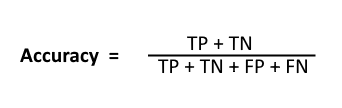


Confusion Matrix is defined as :

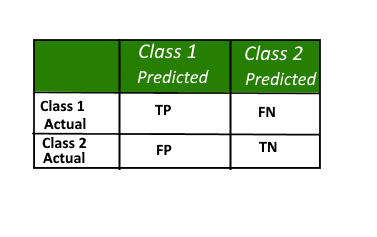


**Recall:** Recall gives us an idea about when it’s actually yes, how often does it predict yes.
**Recall = TP / (TP + FN)** 

**Precision:** Precsion tells us about when it predicts yes, how often is it correct.
**Precision = TP / (TP + FP)**

**F-measure:**
**Fmeasure = (2 * Recall * Precision) / (Recall + Presision)** 



**Definition of the Terms:**

Positive (P) : Observation is positive (for example: is an apple).

Negative (N) : Observation is not positive (for example: is not an apple).

True Positive (TP) : Observation is positive, and is predicted to be positive.

False Negative (FN) : Observation is positive, but is predicted negative.

True Negative (TN) : Observation is negative, and is predicted to be negative.

False Positive (FP) : Observation is negative, but is predicted positive.

Source: [12]


*Evaluation results for Random Forest Classifier*

In [ ]:
#predicting test data, Source:[13], [14]
y_predict = modelR.predict (X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predict))
#plotting a confusion matrix

disp = plot_confusion_matrix(modelR, X_test, y_test,
                                 display_labels=["Good","Bad"],
                                 cmap=plt.cm.Blues,
                             values_format='d'
                            )

index = ['Scores']  
columns = ['Precision', "Recall", "F-score", "None/Undefined Column"] 
x=precision_recall_fscore_support(y_test, y_predict, average='macro')   
cm_df = pd.DataFrame(x,columns,index)                      
plt.figure(figsize=(6,6))  
sns.heatmap(cm_df, annot=True)

*Evaluation results for eXtreme Gradient Boosting Classifier*

In [ ]:
#predicting test data, Source:[13], [14]
y_predictxgb = xgbfit.predict (X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predictxgb))

#plotting a confusion matrix

disp = plot_confusion_matrix(xgbfit, X_test, y_test,
                                 display_labels=["Good","Bad"],
                                 cmap=plt.cm.Blues,
                             values_format='d'
                            )
index = ['Scores']  
columns = ['Precision', "Recall", "F-score", "None/Undefined Column"] 
x=precision_recall_fscore_support(y_test, y_predictxgb, average='macro')   
cm_df = pd.DataFrame(x,columns,index)                      
plt.figure(figsize=(6,6))  
sns.heatmap(cm_df, annot=True)

*Evaluation results for Logistic Regression*

In [ ]:
##predicting test data, Source:[13], [14]
y_predictLR = modelLR.predict(X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predictLR))

#plotting a confusion matrix

disp = plot_confusion_matrix(modelLR, X_test, y_test,
                                 display_labels=["Good","Bad"],
                                 cmap=plt.cm.Blues,
                             values_format='d'
                            )
index = ['Scores']  
columns = ['Precision', "Recall", "F-score", "None/Undefined Column"] 
x=precision_recall_fscore_support(y_test, y_predictLR, average='macro')   
cm_df = pd.DataFrame(x,columns,index)                      
plt.figure(figsize=(6,6))  
sns.heatmap(cm_df, annot=True)

*Evaluation results for Support Vector Machines Classifier*

In [ ]:
##predicting test data, Source:[13], [14]
y_predictSVM = svmc.predict(X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predictSVM))

#plotting a confusion matrix

disp = plot_confusion_matrix(svmc, X_test, y_test,
                                 display_labels=["Good","Bad"],
                                 cmap=plt.cm.Blues,
                             values_format='d'
                            )
index = ['Scores']  
columns = ['Precision', "Recall", "F-score", "None/Undefined Column"] 
x=precision_recall_fscore_support(y_test, y_predictSVM, average='macro')   
cm_df = pd.DataFrame(x,columns,index)                      
plt.figure(figsize=(6,6))  
sns.heatmap(cm_df, annot=True)

*Evaluation results for K-nearest neighbours (k=3) Classifier*

In [ ]:
#predicting test data, Source: [13],[14]
y_predictn = modeln.predict(X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predictn))

#plotting a confusion matrix

disp = plot_confusion_matrix(modeln, X_test, y_test,
                                 display_labels=["Good","Bad"],
                                 cmap=plt.cm.Blues,
                             values_format='d'
                            )
index = ['Scores']  
columns = ['Precision', "Recall", "F-score", "None/Undefined Column"] 
x=precision_recall_fscore_support(y_test, y_predictn, average='macro')   
cm_df = pd.DataFrame(x,columns,index)                      
plt.figure(figsize=(6,6))  
sns.heatmap(cm_df, annot=True)


*Evaluation results for Neural Network*

In [ ]:
#predicting test data, Source : [13,14]
y_predictNN = model.predict (X_test)
y_predictNN=np.argmax(y_predictNN, axis=1)
print('Accuracy Score is',accuracy_score(y_test, y_predictNN))
#plotting a confusion matrix
index1 = ['Good', "Bad"]  
columns1 = ['Good',"Bad"] 
cm= confusion_matrix(y_test, y_predictNN)   
cm_df1 = pd.DataFrame(cm,columns1,index1)                      
plt.figure(figsize=(4,4))  
sns.heatmap(cm_df1, annot=True)

index = ['Scores']  
columns = ['Precision', "Recall", "F-score", "None/Undefined Column"] 
x=precision_recall_fscore_support(y_test, y_predictNN, average='macro')   
cm_df = pd.DataFrame(x,columns,index)                      
plt.figure(figsize=(6,6))  
sns.heatmap(cm_df, annot=True)

**Comparison among different algorithms**

In [ ]:
#Accuracy scores of all the above algorithms, Source[15]

# data to plot
n_groups = 5
test_acc = (0.9813, 0.9824, 0.9824, 0.9805, 0.9824)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects2 = plt.bar(index + bar_width,test_acc, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Testing Accuracy')
 
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Comparison ')
plt.xticks(index + bar_width, ('Random Forest (0.9813', 'XgBoost (0.9824)', 'SVM (0.9824)', 'KNearest (0.9805)','NeuralNetworks (0.9824)'), rotation = 45)
plt.legend()
 
plt.tight_layout()
plt.figure(figsize=(4,4))
plt.show()

In [ ]:
#Misclassification errors of all above algorithms, Source:[15]
# data to plot
n_groups = 5
err = (141,132,132,147,130)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects2 = plt.bar(index + bar_width,test_acc, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Misclassification Errors')
 
plt.xlabel('ML Models')
plt.ylabel('Number of misclassified errors')
plt.title('Comparison ')
plt.xticks(index + bar_width, ('Random Forest (141)', 'XgBoost (132)', 'SVM (132)', 'KNearest (147)','NeuralNetworks (130)'),rotation =45)
plt.legend()
 
plt.tight_layout()
plt.figure(figsize=(4,4))
plt.show()


**Results and Conclusion**

*All the algorithms have similar testing accuracy of approximately 98%,the reason for this are quanities of good accounts in both training and testing data. Nevertheless,  Gradient Boosting and Neural Networks performs the best among others and have equal scores upto 4 decimal places. On further analysis, in terms of misclassification errors, Neural Network shows 2 errors less than Gradient Boosting.*

In [ ]:
cc_app.head()

# Secondary Approach using WOE method and Logistic regression

In [ ]:
cc_app.shape

In [ ]:
cc_app.info()

In [ ]:
cc_app.describe()

In [ ]:
#Source[20]
sns.set(font_scale=1.4)
cc_app['STATUS'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status", labelpad=14)
plt.ylabel("Count of Status", labelpad=14)

The dataset shows the customer in Status C.

In [ ]:
#Source[20]
cc_app.MONTHS_BALANCE.value_counts().plot.hist()
plt.show()

Most of the customer have a month balance betwenn 0 - 5000 and 30000-35000

In [ ]:
#How long has each customer a card
#Source[16]
cc_app['MONTHS_BALANCE'] = cc_app.MONTHS_BALANCE.apply(lambda x : x*(-1))
cardholder_tenure = pd.DataFrame(cc_app.groupby('ID').agg({'MONTHS_BALANCE' : max}))
cardholder_tenure.rename(columns = {'MONTHS_BALANCE':'CUST_FOR_MONTHS'},inplace = True)
cardholder_tenure.head()

In [ ]:
#merge the files application_records and credit_record to get the number of months for every customer  that has a card.
#Source[16]
cust_data = pd.merge(df,cardholder_tenure,on = 'ID',how = 'inner')
cust_data.head()

In [ ]:
cust_data.shape

In [ ]:
cc_app['STATUS'][cc_app["STATUS"] == 'C'] = -1
cc_app['STATUS'][cc_app["STATUS"] == 'X'] = -1
cc_app.head()

In [ ]:
cc_app['STATUS'] = cc_app.STATUS.apply(lambda x : int(x))

In [ ]:
#Source[16]
cc_app.sort_values(by = 'STATUS',ascending = False,inplace = True)
cc_app.drop_duplicates(subset = ['ID'],inplace = True)
cc_app.shape

Acceptance: A customer who has an outstanding payment for more than 60 days is considered a bad customer. Therefore all customers will receive the STATUS >=2.

In [ ]:
#Source[16]
cc_app['target'] = cc_app.STATUS.apply(lambda x : 0 if x>=2 else 1)
cc_app.drop(['STATUS','MONTHS_BALANCE'],axis = 1,inplace = True)
cc_app.head()

In [ ]:
cc_app.target.value_counts()

In [ ]:
#Source[16]
cust_data = pd.merge(cust_data, cc_app, on = "ID", how = "inner")
cust_data.shape

In [ ]:
cust_data.head()

In [ ]:
cust_data.columns

In [ ]:
#drop the rows by setting the subset
#Source[16]
cust_data.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS',
       'target'],inplace = True)

In [ ]:
cust_data.shape

In [ ]:
#Source[16]
pvt_tbl = pd.pivot_table(data = cust_data, index = ['OCCUPATION_TYPE'], columns = ['NAME_FAMILY_STATUS'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,10])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
#Source[16]
pvt_tbl = pd.pivot_table(data = cust_data, index = ['NAME_INCOME_TYPE'], columns = ['NAME_HOUSING_TYPE'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,6])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
cust_data.info()

In [ ]:
#Convert binary columns to an integer value
#Source[16]
cust_data['CODE_GENDER'] = cust_data.CODE_GENDER.apply(lambda x : 0 if x == 'M' else 1)
cust_data['FLAG_OWN_CAR'] = cust_data.FLAG_OWN_CAR.apply(lambda x : 0 if x == 'N' else 1)
cust_data['FLAG_OWN_REALTY'] = cust_data.FLAG_OWN_REALTY.apply(lambda x : 0 if x == 'N' else 1)
cust_data.head()

In [ ]:
cust_data.describe()

In [ ]:
cust_data.FLAG_MOBIL.value_counts()

All FLAG_MOBIL lines have a 1, if there are no columns, this should be omitted

In [ ]:
cust_data.drop('FLAG_MOBIL', axis = 1, inplace = True)
cust_data.head()

In [ ]:
#fammebers are float, convert it to int
cust_data['CNT_FAM_MEMBERS'] = cust_data['CNT_FAM_MEMBERS'].astype('int')
cust_data.head()

In [ ]:
cust_data[cust_data['DAYS_EMPLOYED'] > 0]

In [ ]:
cust_data[(cust_data['DAYS_EMPLOYED'] > 0) & (cust_data.NAME_INCOME_TYPE == 'Pensioner')].shape

Outliers are checked at 'DAYS_EMPLOYED' and all customers with a positive 'DAYS_EMPLOYED' are pensioners and represent valid data

In [ ]:
#Convert Integer to positive integers
def convert_to_positive(df,column) :
    df[column] = df[column].apply(lambda x : x*-1)
    return df

In [ ]:
continuous_variable = ['DAYS_BIRTH','DAYS_EMPLOYED']
for c in continuous_variable :
    cust_data = convert_to_positive(cust_data,c)
cust_data.head()

In [ ]:
#Convert DAYS to YEARS
cust_data['EMP_YEARS'] = cust_data.DAYS_EMPLOYED/365
cust_data['AGE'] = cust_data.DAYS_BIRTH/365
cust_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1,inplace = True)
cust_data.head()

In [ ]:
cust_data['EMP_YEARS'] = cust_data.EMP_YEARS.apply(lambda x : -1 if x<0 else x)

In [ ]:
#Source[16]
def bad_cust_proportion(col) :
    bad_prop_cnt = cust_data.groupby([col,'target']).agg({'ID': 'count'})
    bad_prop_percent = bad_prop_cnt.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    return bad_prop_percent

In [ ]:
bad_cust_proportion('FLAG_OWN_CAR')

The percentage of bad customers is lower for people who own a car than for people who do not own a car

In [ ]:
bad_cust_proportion('NAME_HOUSING_TYPE')

People who live in an 'office apartment' have the highest percentage of bad customers, followed by people who live in Co-op apartment.

In [ ]:
bad_cust_proportion('NAME_FAMILY_STATUS')

Singles have the largest share of bad customers

In [ ]:
#Source[16]
cust_data['OCCUPATION_TYPE'] = cust_data.OCCUPATION_TYPE.apply(lambda x : 'UNEMPLOYED' if pd.isnull(x) else x)
cust_data.OCCUPATION_TYPE.value_counts()

Calculate WoE and IV for credit card



In [ ]:
#Source[16]
def calc_woe_iv(col) :
    df = pd.DataFrame(columns = ['values','total','good','bad','event_rate','non_event_rate','per_total_events','per_total_non_events','WOE','IV'])
    df['values'] = cust_data[col].unique()
    df.set_index('values',inplace = True)
    
    values = cust_data[col].unique()
    total_dict = dict(cust_data.groupby(col).size())
    col_target_dict = dict(cust_data.groupby([col,'target']).size())
    target_count = dict(cust_data.groupby(['target']).size())
    
    for value in values :
        df.loc[value]['total'] = total_dict[value]
        if (value,1) in col_target_dict:
            df.loc[value]['good'] = col_target_dict[(value,1)]
        else :
            df.loc[value]['good'] = 0
        
        if (value,0) in col_target_dict:
            df.loc[value]['bad'] = col_target_dict[(value,0)]
        else :
            df.loc[value]['bad'] = 0
            
        if df.loc[value]['bad'] == 0 :
            df = df.drop([value])
        
    df['event_rate'] = df['good']/df['total']
    df['non_event_rate'] = df['bad']/df['total']
    
    df['per_total_events'] = df['good']/target_count[1]
    df['per_total_non_events'] = df['bad']/target_count[0]
    
    df['WOE'] = np.log(df.per_total_events.astype('float64')/df.per_total_non_events.astype('float64'))
    df['IV'] = (df['per_total_events'] - df['per_total_non_events']) * df['WOE']
    
    return df  

In [ ]:
iv_values = pd.DataFrame(columns = ['col_name','iv_value'])

In [ ]:
#Source[16]
iv_values['col_name'] = cust_data.columns
iv_values.set_index(['col_name'],inplace = True)
iv_values.drop(['ID','target'],inplace = True)
iv_values

Binary features

In [ ]:
#Source[16]
CODE_GENDER_df = calc_woe_iv('CODE_GENDER')
iv_values.loc['CODE_GENDER'] = CODE_GENDER_df.IV.sum()
print(iv_values.loc['CODE_GENDER'])
CODE_GENDER_df

In [ ]:
#Source[16]
FLAG_OWN_CAR_df = calc_woe_iv('FLAG_OWN_CAR')
iv_values.loc['FLAG_OWN_CAR'] = FLAG_OWN_CAR_df.IV.sum()
print(iv_values.loc['FLAG_OWN_CAR'])
FLAG_OWN_CAR_df

In [ ]:
#Source[16]
FLAG_OWN_REALTY_df = calc_woe_iv('FLAG_OWN_REALTY')
iv_values.loc['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_df.IV.sum()
print(iv_values.loc['FLAG_OWN_REALTY'])
FLAG_OWN_REALTY_df

In [ ]:
#Source[16]
FLAG_WORK_PHONE_df = calc_woe_iv('FLAG_WORK_PHONE')
iv_values.loc['FLAG_WORK_PHONE'] = FLAG_WORK_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_WORK_PHONE'])
FLAG_WORK_PHONE_df

In [ ]:
#Source[16]
FLAG_PHONE_df = calc_woe_iv('FLAG_PHONE')
iv_values.loc['FLAG_PHONE'] = FLAG_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_PHONE'])
FLAG_PHONE_df

In [ ]:
#Source[16]
FLAG_EMAIL_df = calc_woe_iv('FLAG_EMAIL')
iv_values.loc['FLAG_EMAIL'] = FLAG_EMAIL_df.IV.sum()
print(iv_values.loc['FLAG_EMAIL'])
FLAG_EMAIL_df

Categorical Variables

In [ ]:
#Source[16]
NAME_INCOME_TYPE_df = calc_woe_iv('NAME_INCOME_TYPE')
iv_values.loc['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_df.IV.sum()
print(iv_values.loc['NAME_INCOME_TYPE'])
NAME_INCOME_TYPE_df

In [ ]:
#Source[16]
NAME_EDUCATION_TYPE_df = calc_woe_iv('NAME_EDUCATION_TYPE')
iv_values.loc['NAME_EDUCATION_TYPE'] = NAME_EDUCATION_TYPE_df.IV.sum()
print(iv_values.loc['NAME_EDUCATION_TYPE'])
NAME_EDUCATION_TYPE_df

In [ ]:
#Source[16]
NAME_FAMILY_STATUS_df = calc_woe_iv('NAME_FAMILY_STATUS')
iv_values.loc['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_df.IV.sum()
print(iv_values.loc['NAME_FAMILY_STATUS'])
NAME_FAMILY_STATUS_df

In [ ]:
#Source[16]
NAME_HOUSING_TYPE_df = calc_woe_iv('NAME_HOUSING_TYPE')
iv_values.loc['NAME_HOUSING_TYPE'] = NAME_HOUSING_TYPE_df.IV.sum()
print(iv_values.loc['NAME_HOUSING_TYPE'])
NAME_HOUSING_TYPE_df

In [ ]:
#Source[16]
OCCUPATION_TYPE_df = calc_woe_iv('OCCUPATION_TYPE')
iv_values.loc['OCCUPATION_TYPE'] = OCCUPATION_TYPE_df.IV.sum()
print(iv_values.loc['OCCUPATION_TYPE'])
OCCUPATION_TYPE_df

Continuous Variables

In [ ]:
cust_data.describe()

In [ ]:
cust_data['cnt_child_category'] = cust_data.CNT_CHILDREN.apply(lambda x : '1+' if x>= 2 else str(x))

All bins should have at least 5% of the total detection, so 'CNT_CHILDREN' is split into [0,1,1+] bins.

In [ ]:
#Source[16]
CNT_CHILDREN_df = calc_woe_iv('cnt_child_category')
iv_values.loc['CNT_CHILDREN'] = CNT_CHILDREN_df.IV.sum()
print(iv_values.loc['CNT_CHILDREN'])
CNT_CHILDREN_df

In [ ]:
cust_data.AMT_INCOME_TOTAL.head()

In [ ]:
#Source[16]
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']
cust_data['income_bin'] = pd.cut(cust_data['AMT_INCOME_TOTAL'], bins = bins, labels = labels)
cust_data.head()

In [ ]:
cust_data.income_bin.value_counts()

In [ ]:
cust_data.income_bin.value_counts()

In [ ]:
#Source[16]
AMT_INCOME_TOTAL_df = calc_woe_iv('income_bin')
iv_values.loc['AMT_INCOME_TOTAL'] = AMT_INCOME_TOTAL_df.IV.sum()
print(iv_values.loc['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_df.sort_values(by = 'WOE',inplace = True)
AMT_INCOME_TOTAL_df

In [ ]:
cust_data.CNT_FAM_MEMBERS.value_counts()

In [ ]:
cust_data['cnt_family_bin'] = cust_data.CNT_FAM_MEMBERS.apply(lambda x : '3+' if x>= 4 else str(x))

In [ ]:
#Source[16]
CNT_FAM_MEMBERS_df = calc_woe_iv('cnt_family_bin')
iv_values.loc['CNT_FAM_MEMBERS'] = CNT_FAM_MEMBERS_df.IV.sum()
print(iv_values.loc['CNT_FAM_MEMBERS'])
CNT_FAM_MEMBERS_df.sort_values(by = 'WOE',inplace = True)
CNT_FAM_MEMBERS_df

In [ ]:
#Source[16]
bins = [-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
labels = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
cust_data['months_bin'] = pd.cut(cust_data['CUST_FOR_MONTHS'], bins = bins,labels = labels)
cust_data.head()

In [ ]:
cust_data.months_bin.value_counts()

In [ ]:
#Source[16]
CUST_FOR_MONTHS_df = calc_woe_iv('months_bin')
iv_values.loc['CUST_FOR_MONTHS'] = CUST_FOR_MONTHS_df.IV.sum()
print(iv_values.loc['CUST_FOR_MONTHS'])
CUST_FOR_MONTHS_df.sort_values(by = 'WOE',inplace = True)
CUST_FOR_MONTHS_df

In [ ]:
#Source[16]
cust_data['EMP_YEARS'] = cust_data.EMP_YEARS.apply(lambda x : -1 if x<0 else x)

In [ ]:
#Source[16]
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired','5','10','15','20','20+']
cust_data['emp_years_bin'] = pd.cut(cust_data['EMP_YEARS'], bins = bins, labels = labels)
cust_data.head()

In [ ]:
cust_data.emp_years_bin.value_counts()

In [ ]:
#Source[16]
EMP_YEARS_df = calc_woe_iv('emp_years_bin')
iv_values.loc['EMP_YEARS'] = EMP_YEARS_df.IV.sum()
print(iv_values.loc['EMP_YEARS'])
EMP_YEARS_df.sort_values(by = 'WOE',inplace = True)
EMP_YEARS_df

In [ ]:
iv_values.sort_values(by = 'iv_value',ascending=False,inplace = True)
iv_values

In [ ]:
cust_data.columns

In [ ]:
cust_data_train = cust_data[[ 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                             'OCCUPATION_TYPE', 'CUST_FOR_MONTHS', 'cnt_child_category', 'income_bin', 'cnt_family_bin',
                             'months_bin', 'emp_years_bin', 'target']]

Creating Dummies for categorical features

In [ ]:
#Source[16]
def creatingDummyVariables(df, columns) :
    # Creating a dummy variable for some of the categorical variables and dropping the first one.
    dummy1 = pd.get_dummies(df[columns], drop_first=True)
    
    # Adding the results to the master dataframe
    df1 = pd.concat([df, dummy1], axis=1)
    
    #Dropping the initial column
    df1.drop(columns, axis = 1, inplace = True)
    
    return df1

In [ ]:
cust_data_train = creatingDummyVariables(cust_data_train, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                      'OCCUPATION_TYPE', 'cnt_child_category','income_bin', 'cnt_family_bin', 'months_bin',
                      'emp_years_bin'])

In [ ]:
cust_data_train.head()

In [ ]:
# Logistic regression model 
#Source[16]
def logisticRegression (df) :
    # Putting feature variable to X
    X = df.drop(['target'], axis=1)
    y = df['target']
    
    # Splitting the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
    
    #Generalized Linear Model (GLM)
    modelLRr = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()) #describe the GLM 
    res = modelLRr.fit() # fit the model
    return res

In [ ]:
#Source[16]
res = logisticRegression(cust_data_train)
res.summary() # summarize the GLM

**Coeff ** - values for the logistic regression equation to predict the dependent variable from the independent variable. 

**Std. Err.** - Standard errors associated with the coefficients.  Used to test whether the parameter deviates significantly from 0; by dividing the parameter estimate by the standard error, a z value is obtained (see the column with the z and p values). Can also be used for the confidence interval.

**z and P>|z|** - These columns generate the z-value and the 2-tailed p-value, which are used when testing the null hypothesis that the coefficient (parameter) is 0. 

[Source](https://stats.idre.ucla.edu/stata/output/logistic-regression-analysis/)


In [ ]:
iv_values

Removing the columns with the IV value < 0.02 (useless for prediction)
(see IV table)

In [ ]:
cust_data_train = cust_data[['FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                             'OCCUPATION_TYPE','CUST_FOR_MONTHS', 'months_bin', 'emp_years_bin','target']]

In [ ]:
#Source[16]
cust_data_train = creatingDummyVariables(cust_data_train, ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                            'OCCUPATION_TYPE', 'months_bin', 'emp_years_bin'])

In [ ]:
#Source[16]
res = logisticRegression(cust_data_train)
res.summary()

In [ ]:
#Source[16]
cust_data_train = cust_data[['FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                             'OCCUPATION_TYPE','CUST_FOR_MONTHS', 'months_bin', 'emp_years_bin', 'target']]

In [ ]:
#Source[16]
cust_data_train = creatingDummyVariables(cust_data_train, ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                            'OCCUPATION_TYPE', 'months_bin', 'emp_years_bin'])

In [ ]:
#Source[16]
# Putting feature variable to X
X = cust_data_train.drop(['target'], axis=1)
y = cust_data_train['target']
    
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

**Future Work**

1. Different techniques like upsampling etc.  can be used to balance the labels of dataset

2. More data related to bad accounts can be collected.

3. Feature Selection methods like PCA, ANOVA can be used to reduce the number of features.

**References**

[1] https://towardsdatascience.com/why-using-crisp-dm-will-make-you-a-better-data-scientist-66efe5b72686

[2] https://www.kaggle.com/rikdifos/credit-card-approval-prediction

[3] https://seaborn.pydata.org/generated/seaborn.countplot.html

[4] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

[5] https://www.investopedia.com/terms/d/delinquent-account-credit-card.asp#:~:text=For%20the%20perspective%20of%20a,from%20their%20original%20due%20date.&text=This%20process%20can%20involve%20legal,use%20of%20credit%20collection%20firms.

[6] https://seaborn.pydata.org/generated/seaborn.heatmap.html

[7] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[8] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

[9] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

[10] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

[11] https://www.pluralsight.com/guides/classification-keras

[12] https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

[13] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

[14] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

[15] https://github.com/SaraKhan29/-ML-Predictive-Analysis/blob/master/Code/CancerPrediction_RNA_V3_Structured.ipynb

[16] https://www.kaggle.com/rikdifos/credit-card-approval-prediction-using-ml

[17] https://dfrieds.com/data-analysis/groupby-python-pandas.html

[18]https://datascience.stackexchange.com/questions/34424/size-of-training-data-is-different

[19]https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

[20]https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html